In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sample Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading user behavior data
DATA_PATH = "/content/drive/MyDrive/BT4222 Group 3/1. Data Preparation/Data/user_behavior_data_sampled_parsed_2.parquet" # just change this
queries_df = pd.read_parquet(
    DATA_PATH,
    dtype_backend="pyarrow"
)
queries_df.head()

,query,candidate_wid_list,candidate_label_list,history_qry_list,history_wid_list,history_type_list,history_time_list,candidate_label_list_int,history_type_list_ordinal,query_list,history_qry_list_terms
0,63995226602574196100244625575117,['36098226' '82122191' '34768767' '71429327' '...,[1. 0. 0. 0. 0.],['-1' '68784030' '95922913\x1898423633' '97447...,['9227588' '87422901' '21056095' '65178325' '5...,['ORD' 'CART' 'CART' 'CART' 'CART' 'CART' 'CAR...,[ 0 82448 10315 30 33 241 ...,[1 0 0 0 0],[3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. ...,['63995226' '60257419' '61002446' '25575117'],"[array(['-1'], dtype=object) array(['68784030'..."
1,1254963427438884,['30857980' '44577431' '82696473' '94722703' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['97556135\x1872694219' '46916741' '-1' '2608...,['18256630' '46206270' '86878921' '82100823' '...,['ORD' 'ORD' 'CART' 'CART' 'CART' 'CART' 'ORD'...,[ 0 4813478 14061983 177223 1304133 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3. 2. 2. 1.],['12549634' '27438884'],"[array(['97556135', '72694219'], dtype=object)..."
2,24374376067768939206305,['42155506' '90092899' '66647496' '92302381' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1'],['8133925' '59478082'],['CLICK' 'CLICK'],[ 0 27],[1 1 0 0 0 0 0 0 0 0],[1. 1.],['2437437' '60677689' '39206305'],"[array(['-1'], dtype=object) array(['-1'], dty..."
3,29463948632095349356845164880503931105432...,['97234676' '83859812' '90043344' '51562568' '...,[1. 0. 0. 0. 0.],['34262341\x1851020854\x1859833693\x1813558347...,['49854616' '56947170' '16552251' '79406366' '...,['CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLIC...,[ 0 12 4 14 6 58095 1...,[1 0 0 0 0],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,['29463948' '63209534' '93568451' '64880503' '...,"[array(['34262341', '51020854', '59833693', '1..."
4,2793914964365783663289,['19711065' '83045333' '65555812' '23738187' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['60677689\x1860257419\x1871768678' '39893541...,['45800470' '18419519' '30220497' '81499421' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[2015453 958482 13678 1193864 834215 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. ...,['2793914' '96436578' '3663289'],"[array(['60677689', '60257419', '71768678'], d..."


In [ ]:
# reading product metadata
DATA_PATH = "/content/drive/MyDrive/BT4222 Group 3/1. Data Preparation/Data/product_metadata_parsed.parquet"
products_df = pd.read_parquet(
    DATA_PATH,
    dtype_backend="pyarrow"
)
products_df.head()

,wid,name,brand_id,brand_name,cate_id_1,cate_name_1,cate_id_2,cate_name_2,cate_id_3,cate_name_3,cate_id_4,cate_name_4,shop_id,name_list,brand_name_list,cate_name_1_list,cate_name_2_list,cate_name_3_list,cate_name_4_list
0,90290292,89270446755918046025741917635585029871926...,75019956,8927044675591804,75739187,176355875210311,9682321,176355863043105,56674307,50298719,65420542,50298719,9644527,['89270446' '75591804' '60257419' '1763558' '5...,['89270446' '75591804'],['1763558' '75210311'],['1763558' '63043105'],['50298719'],['50298719']
1,84294794,35314470278253305644862259056538602574191...,90358683,56448622,920973,413810773160222581402210,72011611,4138107765056023,77105805,2883009146686422,14729718,2883009146686422,51346695,['35314470' '27825330' '56448622' '59056538' '...,['56448622'],['41381077' '31602225' '81402210'],['41381077' '65056023'],['28830091' '46686422'],['28830091' '46686422']
2,43985934,99002012107475224750389807345717281391786...,99906610,99002012,24675518,2053319081620728,45178979,976474541190979,41488568,10747522807345713385795688352935,8059148,10747522807345713385795688352935,71737804,['99002012' '10747522' '4750389' '80734571' '7...,['99002012'],['20533190' '81620728'],['9764745' '41190979'],['10747522' '80734571' '33857956' '88352935'],['10747522' '80734571' '33857956' '88352935']
3,58357343,37269793566964962025051838249885733255404...,67566476,37269793417877055669649659865766,98432384,49629523385795642329532,78943759,42329532,84880674,25517595,16697032,25517595,45062963,['37269793' '56696496' '20250518' '38249885' '...,['37269793' '41787705' '56696496' '59865766'],['4962952' '33857956' '42329532'],['42329532'],['25517595'],['25517595']
4,71803457,53536632602574194190735260257419201104367...,78161242,53536632417877055360263159865766,6867541,50134995,47765755,290298641345793,66118678,41907352,70549743,41907352,24505854,['53536632' '60257419' '41907352' '60257419' '...,['53536632' '41787705' '53602631' '59865766'],['50134995'],['2902986' '41345793'],['41907352'],['41907352']


# Feature Engineering Part 1

### a. Buying Behavior
Grouping users based on the similarity between the categories of products recommended to them.

In [ ]:
queries_df.dtypes

,0
query,string[pyarrow]
candidate_wid_list,list<element: string>[pyarrow]
candidate_label_list,list<element: double>[pyarrow]
history_qry_list,list<element: string>[pyarrow]
history_wid_list,list<element: string>[pyarrow]
history_type_list,list<element: string>[pyarrow]
history_time_list,list<element: int64>[pyarrow]
candidate_label_list_int,list<element: int64>[pyarrow]
history_type_list_ordinal,list<element: double>[pyarrow]
query_list,list<element: string>[pyarrow]


Finding out how many unique categories exist at each level of the product hierarchy.

In [ ]:
# Some EDA on product categories
num_cat_1 = products_df['cate_id_1'].nunique()
num_cat_2 = products_df['cate_id_2'].nunique()
num_cat_3 = products_df['cate_id_3'].nunique()
num_cat_4 = products_df['cate_id_4'].nunique()
print("no. of categories per level:\n", f"level 1: {num_cat_1}, level 2: {num_cat_2}, level 3: {num_cat_3}, level 4: {num_cat_4}")

no. of categories per level:
 level 1: 64, level 2: 570, level 3: 4769, level 4: 5905


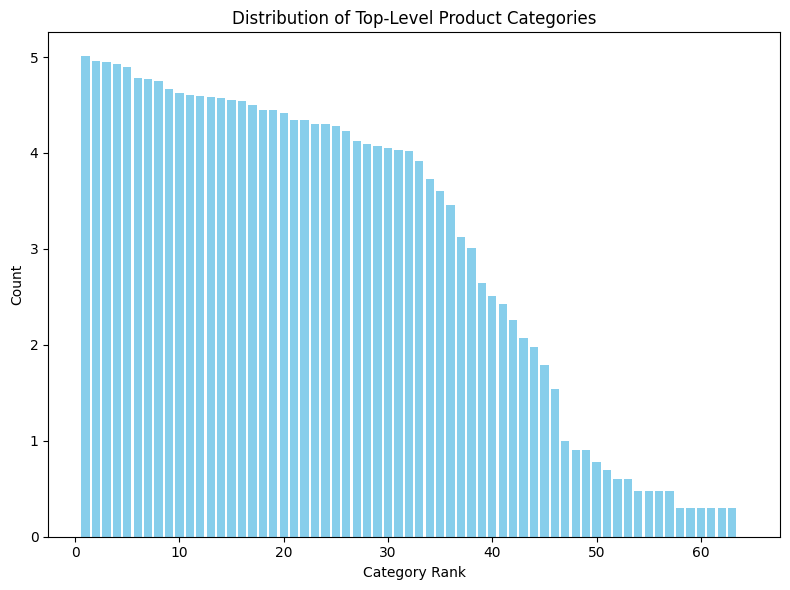

In [ ]:
plt.figure(figsize=(8, 6))
y = products_df['cate_id_1'].value_counts().to_numpy()
y = np.log10(y)
x = np.arange(1, len(y)+1)
plt.bar(x, y, color='skyblue')
plt.title('Distribution of Top-Level Product Categories')
plt.xlabel('Category Rank')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

As we can observe, the number of categories increase exponentially as we descend from the top-level figure of 64. In place of comparing them directly, we shall append the list of categories in two ways: the unique counts of each category by level, and the mean rank of the top-level categories accessed.

This way, we will be computing how **popular** each top-level category (cate_id_1) is, based on its frequency in the product dataset.

We then log transform it, and `log_size` smooths out large differences between categories (since some categories e.g. a category that's similar to “Electronics” could dominate counts compared to smaller ones like “Books”, although we do not know the actual semantic meanings).

In [ ]:
# series for top-level category value counts
cat_sizes = products_df['cate_id_1'].value_counts().reset_index()
cat_sizes.columns = ['cats', 'count']
cat_sizes['log_size'] = np.log10(cat_sizes['count'])

# Create a mapping from wid to categories for faster lookup
wid_to_cats = products_df.set_index('wid')[['cate_id_1', 'cate_id_2', 'cate_id_3', 'cate_id_4']].to_dict('index')

# Create a mapping from cate_id_1 to log_size for faster lookup
cat1_to_log_size = cat_sizes.set_index('cats')['log_size'].to_dict()


# defining a function that will return the number of nunique cats as well as mean popularity of category
def generate_cats_and_mean_rank(queries_df):
    # Use apply with a lambda function that leverages vectorized operations
    df_results = queries_df['history_wid_list'].apply(lambda hist_lst: pd.Series({
        'nunique_cats_1': pd.Series([wid_to_cats.get(wid, {}).get('cate_id_1') for wid in hist_lst]).nunique(),
        'nunique_cats_2': pd.Series([wid_to_cats.get(wid, {}).get('cate_id_2') for wid in hist_lst]).nunique(),
        'nunique_cats_3': pd.Series([wid_to_cats.get(wid, {}).get('cate_id_3') for wid in hist_lst]).nunique(),
        'nunique_cats_4': pd.Series([wid_to_cats.get(wid, {}).get('cate_id_4') for wid in hist_lst]).nunique(),
        'avg_log_cat_1_popularity': pd.Series([cat1_to_log_size.get(wid_to_cats.get(wid, {}).get('cate_id_1')) for wid in hist_lst if wid_to_cats.get(wid, {}).get('cate_id_1') is not None]).mean()
    }))
    return df_results

- `nunique_cats_1`: How many distinct top-level categories the user has interacted with.
(A proxy for how broad their interests are.)
- `nunique_cats_2`, `nunique_cats_3`, `nunique_cats_4`: Same for deeper levels.
(Shows increasing granularity of variety.)
- `avg_log_cat_1_popularity`: The average popularity (in log-scale) of the top-level categories the user has engaged with.

In [ ]:
df_results = generate_cats_and_mean_rank(queries_df)
queries_df = pd.concat([queries_df, df_results], axis=1)

queries_df[['nunique_cats_1', 'nunique_cats_2', 'nunique_cats_3', 'nunique_cats_4', 'avg_log_cat_1_popularity']].head()

,nunique_cats_1,nunique_cats_2,nunique_cats_3,nunique_cats_4,avg_log_cat_1_popularity
0,5.0,5.0,7.0,8.0,4.762177
1,5.0,6.0,7.0,7.0,4.700755
2,1.0,1.0,1.0,1.0,4.581677
3,1.0,4.0,10.0,10.0,4.950861
4,13.0,25.0,52.0,58.0,4.924904


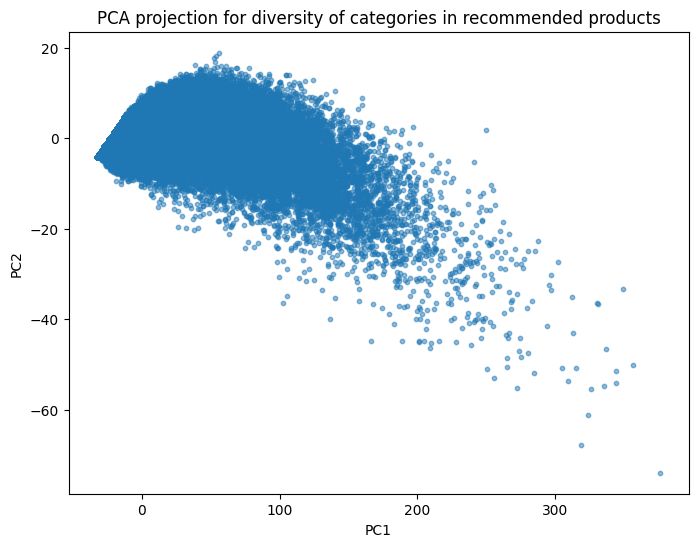

In [ ]:
from sklearn.decomposition import PCA

X = queries_df[['nunique_cats_1', 'nunique_cats_2', 'nunique_cats_3', 'nunique_cats_4']].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection for diversity of categories in recommended products')
plt.show()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=['nunique_cats_1', 'nunique_cats_2', 'nunique_cats_3', 'nunique_cats_4']
)
loadings

,PC1,PC2
nunique_cats_1,0.146430,0.593418
nunique_cats_2,0.348745,0.652708
nunique_cats_3,0.603225,0.026007
nunique_cats_4,0.702178,-0.470266


### b. Richness of History
Identifying low-activity & high-activity users based on query history.

In [ ]:
# inferring number of past interactions based on history_wid_list
queries_df['history_len'] = queries_df['history_wid_list'].apply(lambda x: len(x))

In [ ]:
queries_df['history_len'].describe()

,history_len
count,173831.000000
mean,65.699478
std,96.687828
min,0.000000
25%,11.000000
50%,32.000000
75%,81.000000
max,2396.000000


In [ ]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173831 entries, 0 to 173830
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype                                        
---  ------                     --------------   -----                                        
 0   query                      173831 non-null  string[pyarrow]                              
 1   candidate_wid_list         173831 non-null  list<element: string>[pyarrow]               
 2   candidate_label_list       173831 non-null  list<element: double>[pyarrow]               
 3   history_qry_list           173831 non-null  list<element: string>[pyarrow]               
 4   history_wid_list           173831 non-null  list<element: string>[pyarrow]               
 5   history_type_list          173831 non-null  list<element: string>[pyarrow]               
 6   history_time_list          173831 non-null  list<element: int64>[pyarrow]                
 7   candidate_label_list_int   17

# Feature engineering part 2

## c. Temporal shopping behaviour

We will create features to undersand how frequently the users interact with the products.


We first create `print_feature_summary`, a helper function to print temporal feature summary (mean, std, median etc. in the form of the number of days)

Since the time intervals in the dataset are given in the form of seconds, converting them to the number of days make it more interpretable.

In [ ]:
def print_feature_summary(df, feature_name):
    """
    Print summary statistics for a single temporal feature.
    Converts seconds to days if appropriate.
    """
    series = df[feature_name].dropna()

    # total_active_days is a discrete count; everything else is in seconds
    is_days_column = feature_name != 'total_active_days'

    print(f"\n=== {feature_name} Summary ===")
    print(f"Count: {len(series)}")
    print(f"Mean: {series.mean():.0f}" + (f" sec (~{series.mean()/86400:.1f} days)" if is_days_column else ""))
    print(f"Std: {series.std():.0f}" + (f" sec (~{series.std()/86400:.1f} days)" if is_days_column else ""))
    print(f"Min: {series.min():.0f}" + (f" sec (~{series.min()/86400:.1f} days)" if is_days_column else ""))
    print(f"25%: {series.quantile(0.25):.0f}" + (f" sec (~{series.quantile(0.25)/86400:.1f} days)" if is_days_column else ""))
    print(f"Median: {series.median():.0f}" + (f" sec (~{series.median()/86400:.1f} days)" if is_days_column else ""))
    print(f"75%: {series.quantile(0.75):.0f}" + (f" sec (~{series.quantile(0.75)/86400:.1f} days)" if is_days_column else ""))
    print(f"Max: {series.max():.0f}" + (f" sec (~{series.max()/86400:.0f} days)" if is_days_column else ""))


- `avg_interaction_time_gap`

We use the `history_time_list` column, ignoring the last item in the list (because it is for the test query)

This feature indivates the average interval between consecutive interactions, reflecting a customer's activity frequency.


In [ ]:
# helper function
def compute_avg_interaction_time_gap(df):
    avg_gaps = []

    for gaps in df['history_time_list']:
        if not gaps or len(gaps) < 2:  # no history
            avg_gaps.append(np.nan)
            continue

        # skip last time interval item because that's for the TEST query (history time list is always 1-item longer than the rest)
        gaps = np.array(gaps[:-1])

        avg_gap = gaps.mean() if len(gaps) > 0 else np.nan
        avg_gaps.append(avg_gap)

    return avg_gaps


In [ ]:
queries_df['avg_interaction_time_gap'] = compute_avg_interaction_time_gap(queries_df)
# check
queries_df

,query,candidate_wid_list,candidate_label_list,history_qry_list,history_wid_list,history_type_list,history_time_list,candidate_label_list_int,history_type_list_ordinal,query_list,history_qry_list_terms,nunique_cats_1,nunique_cats_2,nunique_cats_3,nunique_cats_4,avg_log_cat_1_popularity,history_len,avg_interaction_time_gap
0,63995226602574196100244625575117,['36098226' '82122191' '34768767' '71429327' '...,[1. 0. 0. 0. 0.],['-1' '68784030' '95922913\x1898423633' '97447...,['9227588' '87422901' '21056095' '65178325' '5...,['ORD' 'CART' 'CART' 'CART' 'CART' 'CART' 'CAR...,[ 0 82448 10315 30 33 241 ...,[1 0 0 0 0],[3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. ...,['63995226' '60257419' '61002446' '25575117'],"[array(['-1'], dtype=object) array(['68784030'...",5.0,5.0,7.0,8.0,4.762177,55,1.739381e+04
1,1254963427438884,['30857980' '44577431' '82696473' '94722703' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['97556135\x1872694219' '46916741' '-1' '2608...,['18256630' '46206270' '86878921' '82100823' '...,['ORD' 'ORD' 'CART' 'CART' 'CART' 'CART' 'ORD'...,[ 0 4813478 14061983 177223 1304133 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3. 2. 2. 1.],['12549634' '27438884'],"[array(['97556135', '72694219'], dtype=object)...",5.0,6.0,7.0,7.0,4.700755,14,1.663857e+06
2,24374376067768939206305,['42155506' '90092899' '66647496' '92302381' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1'],['8133925' '59478082'],['CLICK' 'CLICK'],[ 0 27],[1 1 0 0 0 0 0 0 0 0],[1. 1.],['2437437' '60677689' '39206305'],"[array(['-1'], dtype=object) array(['-1'], dty...",1.0,1.0,1.0,1.0,4.581677,2,0.000000e+00
3,29463948632095349356845164880503931105432...,['97234676' '83859812' '90043344' '51562568' '...,[1. 0. 0. 0. 0.],['34262341\x1851020854\x1859833693\x1813558347...,['49854616' '56947170' '16552251' '79406366' '...,['CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLIC...,[ 0 12 4 14 6 58095 1...,[1 0 0 0 0],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,['29463948' '63209534' '93568451' '64880503' '...,"[array(['34262341', '51020854', '59833693', '1...",1.0,4.0,10.0,10.0,4.950861,149,2.799236e+03
4,2793914964365783663289,['19711065' '83045333' '65555812' '23738187' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['60677689\x1860257419\x1871768678' '39893541...,['45800470' '18419519' '30220497' '81499421' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[2015453 958482 13678 1193864 834215 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. ...,['2793914' '96436578' '3663289'],"[array(['60677689', '60257419', '71768678'], d...",13.0,25.0,52.0,58.0,4.924904,312,7.750489e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173826,1309591510152488,['47449297' '24072987' '60716048' '82597747' '...,[1. 0. 0. 0. 0.],[],[],[],[],[1 0 0 0 0],[],['13095915' '10152488'],[],0.0,0.0,0.0,0.0,NaN,0,NaN
173827,13231423,['18583858' '56583580' '30506983' '66097379' '...,[1. 0. 0. 0. 0.],['18321627\x1857053231' '-1' '45948050' '26817...,['39791247' '29806016' '29480135' '96539587' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[ 0 123190 605998 1333906 342776 ...,[1 0 0 0 0],[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. ...,['13231423'],"[array(['18321627', '57053231'], dtype=object)...",12.0,24.0,36.0,36.0,4.599701,90,1.414395e+05
173828,65443637,['25796896' '63068369' '64194351' '39537338' '...,[1. 2. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1' '-1' '60572006\x1817663851\x1883482...,['17227311' '97800195' '97800195' '26829442' '...,['CART' 'CART' 'ORD' 'CART' 'CART' 'CART' 'CAR...,[7493164 800 3383 15806 602 8270...,[1 2 0 0 0 0 0 0 0 0],[2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. ...,['65443637'],"[array(['-1'], dtype=object) array(['-1'], dty...",3.0,6.0,10.0,10.0,4.774711,17,7.548786e+05
173829,136532752491501,['72282963' '41121787' '951762' '94184424' '95...,[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,['-1' '-1' '-1' '-1' '-1' '-1' '-1' '-1' '-1' ...,['19432484' '29865883' '60170506' '64971904' '...,['ORD' 

In [ ]:
queries_df['avg_interaction_time_gap'].describe()

,avg_interaction_time_gap
count,1.643970e+05
mean,4.584726e+05
std,1.112563e+06
min,0.000000e+00
25%,6.431370e+04
50%,1.654512e+05
75%,4.169054e+05
max,3.035956e+07


In [ ]:
print_feature_summary(df=queries_df, feature_name="avg_interaction_time_gap")


=== avg_interaction_time_gap Summary ===
Count: 164397
Mean: 458473 sec (~5.3 days)
Std: 1112563 sec (~12.9 days)
Min: 0 sec (~0.0 days)
25%: 64314 sec (~0.7 days)
Median: 165451 sec (~1.9 days)
75%: 416905 sec (~4.8 days)
Max: 30359565 sec (~351 days)


investigating those with 0 `avg_interaction_time_gap`

In [ ]:
zero_avg_time_gaps = queries_df[queries_df['avg_interaction_time_gap'] == 0]
zero_avg_time_gaps

,query,candidate_wid_list,candidate_label_list,history_qry_list,history_wid_list,history_type_list,history_time_list,candidate_label_list_int,history_type_list_ordinal,query_list,history_qry_list_terms,nunique_cats_1,nunique_cats_2,nunique_cats_3,nunique_cats_4,avg_log_cat_1_popularity,history_len,avg_interaction_time_gap
2,24374376067768939206305,['42155506' '90092899' '66647496' '92302381' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1'],['8133925' '59478082'],['CLICK' 'CLICK'],[ 0 27],[1 1 0 0 0 0 0 0 0 0],[1. 1.],['2437437' '60677689' '39206305'],"[array(['-1'], dtype=object) array(['-1'], dty...",1.0,1.0,1.0,1.0,4.581677,2,0.0
44,38395335,['47841115' '94472296' '9647603' '93716906' '8...,[1. 0. 0. 0. 0.],['52440686\x1888593778\x1834838251\x1811210488...,['18747561' '23311167'],['ORD' 'ORD'],[ 0 730995],[1 0 0 0 0],[3. 3.],['38395335'],"[array(['52440686', '88593778', '34838251', '1...",2.0,2.0,2.0,2.0,4.725178,2,0.0
138,39206305491998796025741915390501884163,['60545504' '71365566' '5584579' '22609490' '6...,[1. 0. 0. 0. 0.],['-1' '39206305\x1849199879'],['8372732' '60545504'],['CART' 'CLICK'],[ 0 2499798],[1 0 0 0 0],[2. 1.],['39206305' '49199879' '60257419' '1539050' '1...,"[array(['-1'], dtype=object) array(['39206305'...",2.0,2.0,2.0,2.0,4.665718,2,0.0
279,96830325781736413457241280855185,['53030827' '48777090' '14575702' '10109770' '...,[2. 0. 0. 0. 0.],['53069382' '-1'],['4004993' '84243690'],['ORD' 'ORD'],[0 0],[2 0 0 0 0],[3. 3.],['96830325' '78173641' '34572412' '80855185'],"[array(['53069382'], dtype=object) array(['-1'...",1.0,2.0,2.0,2.0,4.931275,2,0.0
282,18321627263075527219259,['49339401' '72172604' '54872811' '92025112' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['90164295' '-1'],['76405106' '7072359'],['ORD' 'ORD'],[ 0 17862],[1 1 0 0 0 0 0 0 0 0],[3. 3.],['18321627' '26307552' '7219259'],"[array(['90164295'], dtype=object) array(['-1'...",1.0,1.0,2.0,2.0,4.626238,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173429,769384854002984810182360,['69403730' '87515889' '21369098' '75671830' '...,[1. 0. 0. 0. 0.],['-1' '57706963\x187406281\x1876938485\x184002...,['58054852' '69403730'],['CART' 'CLICK'],[ 0 3721401],[1 0 0 0 0],[2. 1.],['76938485' '40029848' '10182360'],"[array(['-1'], dtype=object) array(['57706963...",2.0,2.0,2.0,2.0,4.864782,2,0.0
173514,420904662492125449674713385795681784271,['13508632' '40888057' '25890256' '30559690' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['48193158\x1873018434\x1839206305\x1860677689...,['9930026' '40888057'],['CLICK' 'CLICK'],[ 0 66],[1 1 0 0 0 0 0 0 0 0],[1. 1.],['42090466' '24921254' '4967471' '33857956' '8...,"[array(['48193158', '73018434', '39206305', '6...",2.0,2.0,2.0,2.0,4.568621,2,0.0
173639,739741276067768973018434,['61405449' '66971843' '14932401' '48761590' '...,[1. 0. 0. 0. 0.],['56845628\x1832727031' '59084112\x1860257419...,['29043919' '31278392'],['ORD' 'ORD'],[ 0 2679242],[1 0 0 0 0],[3. 3.],['73974127' '60677689' '73018434'],"[array(['56845628', '32727031'], dtype=object)...",2.0,2.0,2.0,2.0,4.893569,2,0.0
173642,26731401,['48632065' '45516441' '69106992' '8374985' '7...,[1. 0. 0. 0. 0.],['-1' '26731401\x1896267862'],['48632065' '98665739'],['CART' 'CLICK'],[ 0 66],[1 0 0 0 0],[2. 1.],['26731401'],"[array(['-1'], dtype=object) array(['26731401'...",1.0,1.0,1.0,1.0,4.772483,2,0.0


for the rest of the features, we will compute them with a single function (since the code overlaps alot)

In [ ]:
def compute_temporal_features(df):
    std_gaps, total_days, min_gaps, max_gaps = [], [], [], []

    for gaps in df['history_time_list']:
        # skip last element (test query)
        if len(gaps) > 1:
            history_gaps = gaps[:-1]
        else:
            history_gaps = []

        if not history_gaps or len(history_gaps) < 2:  # only 0 or empty
            std_gaps.append(np.nan)
            total_days.append(np.nan)
            min_gaps.append(np.nan)
            max_gaps.append(np.nan)
            continue

        # skip first 0
        gaps = np.array(history_gaps)
        std_gaps.append(gaps.std())
        min_gaps.append(gaps.min())
        max_gaps.append(gaps.max())
        total_days.append(np.sum(gaps > 0))

    df_features = pd.DataFrame({
        'std_time_gap': std_gaps,
        'min_gap': min_gaps,
        'max_gap': max_gaps,
        'total_active_days': total_days,

    })

    return df_features


In [ ]:
# compute temporal features
temporal_features_df = compute_temporal_features(queries_df)

# concatenate with the original DataFrame
queries_df = pd.concat([queries_df, temporal_features_df], axis=1)

# check
queries_df

,query,candidate_wid_list,candidate_label_list,history_qry_list,history_wid_list,history_type_list,history_time_list,candidate_label_list_int,history_type_list_ordinal,query_list,...,nunique_cats_2,nunique_cats_3,nunique_cats_4,avg_log_cat_1_popularity,history_len,avg_interaction_time_gap,std_time_gap,min_gap,max_gap,total_active_days
0,63995226602574196100244625575117,['36098226' '82122191' '34768767' '71429327' '...,[1. 0. 0. 0. 0.],['-1' '68784030' '95922913\x1898423633' '97447...,['9227588' '87422901' '21056095' '65178325' '5...,['ORD' 'CART' 'CART' 'CART' 'CART' 'CART' 'CAR...,[ 0 82448 10315 30 33 241 ...,[1 0 0 0 0],[3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. ...,['63995226' '60257419' '61002446' '25575117'],...,5.0,7.0,8.0,4.762177,55,1.739381e+04,7.167836e+04,0.0,494313.0,50.0
1,1254963427438884,['30857980' '44577431' '82696473' '94722703' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['97556135\x1872694219' '46916741' '-1' '2608...,['18256630' '46206270' '86878921' '82100823' '...,['ORD' 'ORD' 'CART' 'CART' 'CART' 'CART' 'ORD'...,[ 0 4813478 14061983 177223 1304133 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3. 2. 2. 1.],['12549634' '27438884'],...,6.0,7.0,7.0,4.700755,14,1.663857e+06,3.793739e+06,0.0,14061983.0,11.0
2,24374376067768939206305,['42155506' '90092899' '66647496' '92302381' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1'],['8133925' '59478082'],['CLICK' 'CLICK'],[ 0 27],[1 1 0 0 0 0 0 0 0 0],[1. 1.],['2437437' '60677689' '39206305'],...,1.0,1.0,1.0,4.581677,2,0.000000e+00,NaN,NaN,NaN,NaN
3,29463948632095349356845164880503931105432...,['97234676' '83859812' '90043344' '51562568' '...,[1. 0. 0. 0. 0.],['34262341\x1851020854\x1859833693\x1813558347...,['49854616' '56947170' '16552251' '79406366' '...,['CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLICK' 'CLIC...,[ 0 12 4 14 6 58095 1...,[1 0 0 0 0],[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,['29463948' '63209534' '93568451' '64880503' '...,...,4.0,10.0,10.0,4.950861,149,2.799236e+03,1.579450e+04,0.0,154781.0,147.0
4,2793914964365783663289,['19711065' '83045333' '65555812' '23738187' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['60677689\x1860257419\x1871768678' '39893541...,['45800470' '18419519' '30220497' '81499421' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[2015453 958482 13678 1193864 834215 ...,[1 1 0 0 0 0 0 0 0 0],[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. ...,['2793914' '96436578' '3663289'],...,25.0,52.0,58.0,4.924904,312,7.750489e+04,3.143299e+05,0.0,2280803.0,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173826,1309591510152488,['47449297' '24072987' '60716048' '82597747' '...,[1. 0. 0. 0. 0.],[],[],[],[],[1 0 0 0 0],[],['13095915' '10152488'],...,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN
173827,13231423,['18583858' '56583580' '30506983' '66097379' '...,[1. 0. 0. 0. 0.],['18321627\x1857053231' '-1' '45948050' '26817...,['39791247' '29806016' '29480135' '96539587' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[ 0 123190 605998 1333906 342776 ...,[1 0 0 0 0],[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. ...,['13231423'],...,24.0,36.0,36.0,4.599701,90,1.414395e+05,3.195670e+05,0.0,1665100.0,81.0
173828,65443637,['25796896' '63068369' '64194351' '39537338' '...,[1. 2. 0. 0. 0. 0. 0. 0. 0. 0.],['-1' '-1' '-1' '60572006\x1817663851\x1883482...,['17227311' '97800195' '97800195' '26829442' '...,['CART' 'CART' 'ORD' 'CART' 'CART' 'CART' 'CAR...,[7493164 800 3383 15806 602 8270...,[1 2 0 0 0 0 0 0 0 0],[2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. ...,['65443637'],...,6.0,10.0,10.0,4.774711,17,7.548786e+05,1.808487e+06,3.0,7493164.0,16.0
173829,136532752491501,['72282963' '41121787' '951762' '94184424' '95...,[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,['-1' '-1' '-1' '-1' '-1' '-1' '-1' '-1' '-1' ...,['19432484' '29865883' '60170506' '64971904' '...,['ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'ORD' 'OR...,[ 0 1524709 0 0 1299 ...,[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],[3. 3. 3.

- `std_time_gap`

In [ ]:
print_feature_summary(df=queries_df, feature_name="std_time_gap")


=== std_time_gap Summary ===
Count: 159877
Mean: 817288 sec (~9.5 days)
Std: 1154086 sec (~13.4 days)
Min: 0 sec (~0.0 days)
25%: 200735 sec (~2.3 days)
Median: 441755 sec (~5.1 days)
75%: 949934 sec (~11.0 days)
Max: 15681539 sec (~181 days)


- `min_gap`

In [ ]:
print_feature_summary(df=queries_df, feature_name="min_gap")


=== min_gap Summary ===
Count: 159877
Mean: 11491 sec (~0.1 days)
Std: 194515 sec (~2.3 days)
Min: 0 sec (~0.0 days)
25%: 0 sec (~0.0 days)
Median: 0 sec (~0.0 days)
75%: 0 sec (~0.0 days)
Max: 12630821 sec (~146 days)


- `max_gap`

In [ ]:
print_feature_summary(df=queries_df, feature_name="max_gap")


=== max_gap Summary ===
Count: 159877
Mean: 3582927 sec (~41.5 days)
Std: 3917413 sec (~45.3 days)
Min: 0 sec (~0.0 days)
25%: 1130093 sec (~13.1 days)
Median: 2342593 sec (~27.1 days)
75%: 4538431 sec (~52.5 days)
Max: 31472182 sec (~364 days)


- `total_active_days`

This feature counts the number of **non-zero** time gaps in each customer’s interaction history (excluding the last entry, which is reserved for the test query).

Each non-zero gap represents a day (or time interval) where a customer was active and performed a transaction after some inactivity.

By summing up these non-zero gaps, we estimate how consistently engaged a customer is over time — i.e., how many distinct occasions they returned to trade or interact again.

This captures engagement frequency across the customer’s activity history.
- Higher values indicate regular, ongoing participation over time rather than a burst of activity in a short span.
- Useful for understanding behavioral consistency and temporal loyalty patterns, which can complement recency-based or frequency-based features.


In [ ]:
print_feature_summary(df=queries_df, feature_name="total_active_days")


=== total_active_days Summary ===
Count: 159877
Mean: 62
Std: 88
Min: 0
25%: 13
Median: 33
75%: 78
Max: 2317


## d. Interaction ratios

We create a helper function to create the interaction ratios (`click_ratio`, `follow_ratio`,  `cart_ratio`, `order_ratio`)

These features capture **behavioral preferences and intent**, helping us distinguish between casual browsers, engaged followers, and high-conversion customers.


In [ ]:
def compute_interaction_ratios(df):
    click_ratio, follow_ratio, cart_ratio, order_ratio = [], [], [], []

    for types in df['history_type_list']:
        history_types = types

        if not history_types:
            # empty history
            click_ratio.append(np.nan)
            follow_ratio.append(np.nan)
            cart_ratio.append(np.nan)
            order_ratio.append(np.nan)
            continue

        total = len(history_types)
        clicks = history_types.count('CLICK')
        follows = history_types.count('FLW')
        carts = history_types.count('CART')
        orders = history_types.count('ORD')

        click_ratio.append(clicks / total)
        follow_ratio.append(follows / total)
        cart_ratio.append(carts / total)
        order_ratio.append(orders / total)

    # create a DataFrame
    df_ratios = pd.DataFrame({
        'click_ratio': click_ratio,
        'follow_ratio': follow_ratio,
        'cart_ratio': cart_ratio,
        'order_ratio': order_ratio
    })

    return df_ratios


In [ ]:
# compute the interaction ratios
interaction_ratios = compute_interaction_ratios(queries_df)
# add to main df
queries_df = pd.concat([queries_df, interaction_ratios], axis=1)
# check
queries_df[['click_ratio', 'follow_ratio', 'cart_ratio', 'order_ratio']].head()



,click_ratio,follow_ratio,cart_ratio,order_ratio
0,0.490909,0.0,0.436364,0.072727
1,0.071429,0.0,0.571429,0.357143
2,1.000000,0.0,0.000000,0.000000
3,0.993289,0.0,0.006711,0.000000
4,0.605769,0.0,0.246795,0.147436


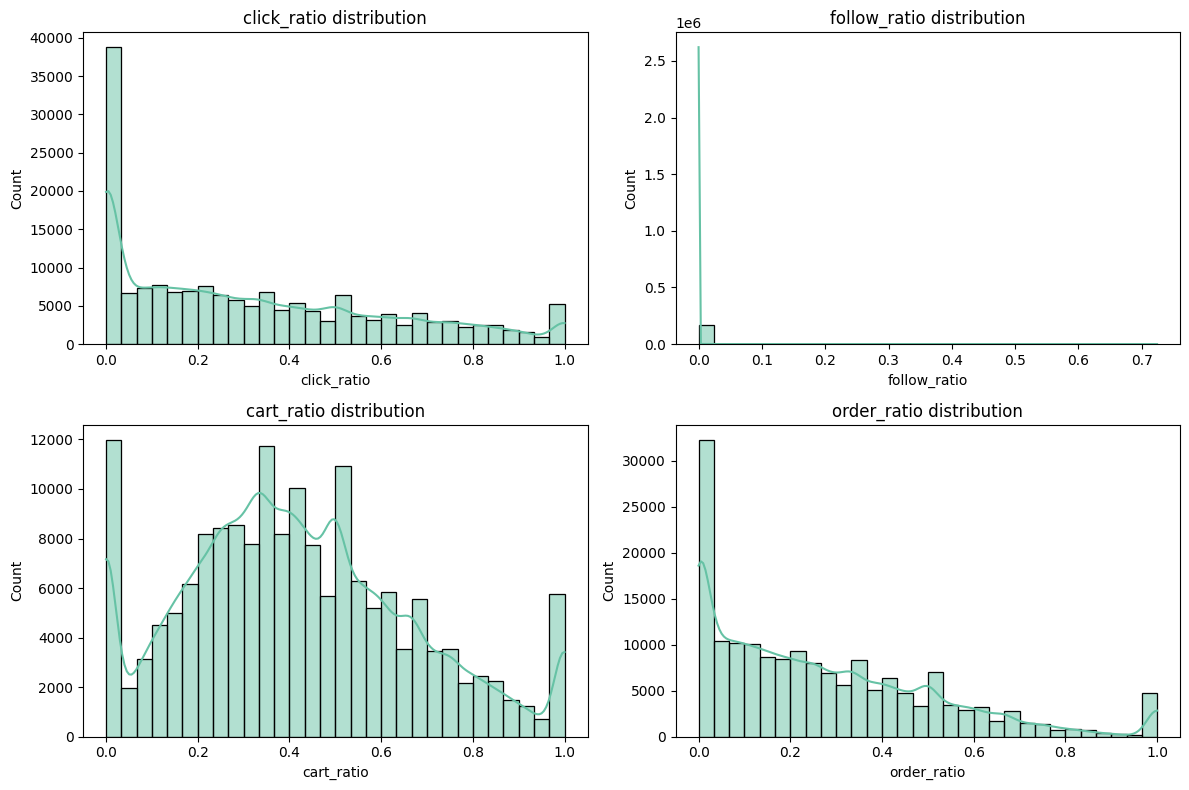

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ratios = ['click_ratio', 'follow_ratio', 'cart_ratio', 'order_ratio']

#  set color palette
sns.set_palette("Set2")
plt.figure(figsize=(12,8))
for i, col in enumerate(ratios, 1):
    plt.subplot(2, 2, i)
    sns.histplot(queries_df[col].dropna(), bins=30, kde=True)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

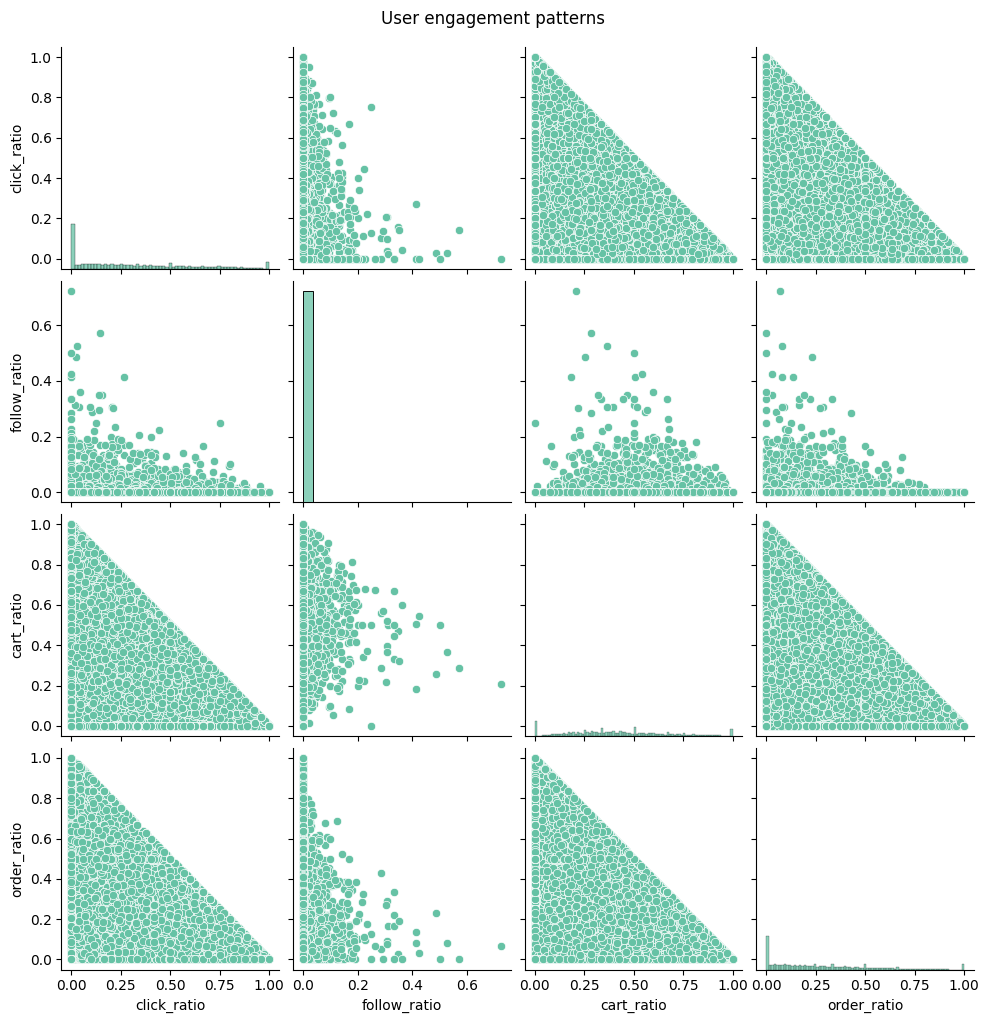

In [ ]:
sns.pairplot(queries_df[ratios].dropna())
plt.suptitle("User engagement patterns", y=1.02)
plt.show()


We'll now do PCA to understand our users better based on their interaction ratios.

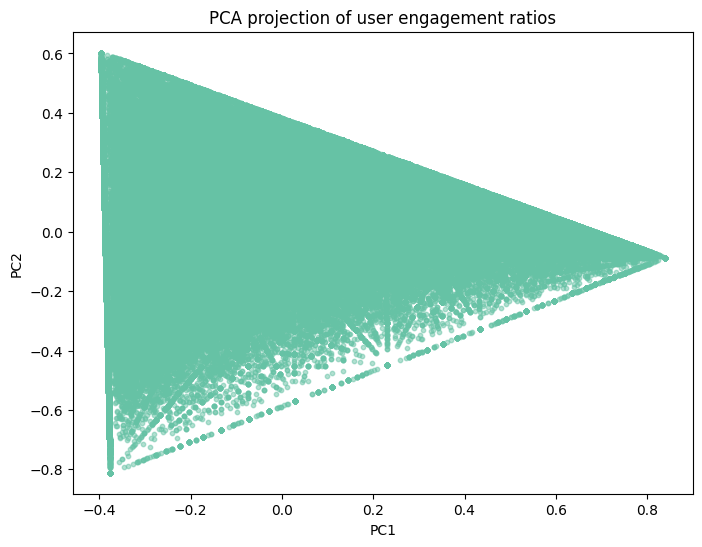

In [ ]:
from sklearn.decomposition import PCA

X = queries_df[ratios].fillna(0).values  # fill NaNs with 0 for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection of user engagement ratios')
plt.show()


In [ ]:
# see how much information each PC captures
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")
print(f"Total: {pca.explained_variance_ratio_.sum():.2%}")

PC1 explains 58.77% of variance
PC2 explains 37.20% of variance
Total: 95.97%


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=ratios
)
loadings

,PC1,PC2
click_ratio,0.814833,0.023765
follow_ratio,-0.000246,0.000480
cart_ratio,-0.419834,0.713170
order_ratio,-0.399734,-0.700588


**PC1 ("browsers vs converters"?)**

- click_ratio: +0.81 (strong positive)
- cart_ratio: -0.42 (moderate negative)
- order_ratio: -0.40 (moderate negative)
- follow_ratio: ~0 (negligible)

positive PC1 (right): high click ratio (browsers/explorers)

negative PC1 (left): high cart/order ratios (converters/buyers)



**PC2 ("cart abandoners vs purchase completers"?)**

- cart_ratio: +0.71 (strong positive)
- order_ratio: -0.70 (strong negative)
- click_ratio: ~0 (negligible)
- follow_ratio: ~0 (negligible)

positive PC2 (top): high cart ratio, low orders = cart abandoners (add to cart but don't buy)

negative PC2 (bottom): high order ratio, low cart = direct buyers (buy without much cart browsing)

**trying clustering**

([<matplotlib.axis.XTick at 0x7c4695af5a60>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

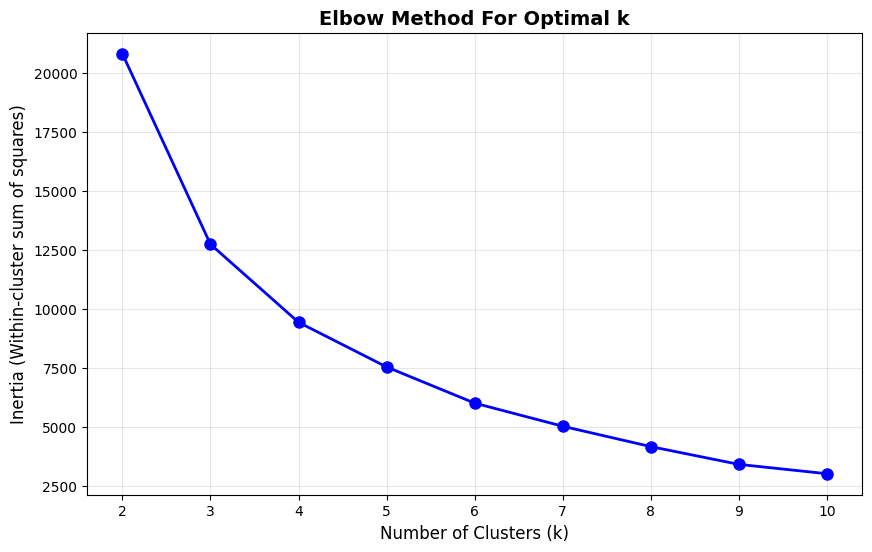

In [ ]:
from sklearn.cluster import KMeans

X = queries_df[ratios].fillna(0).values

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)


select k=4

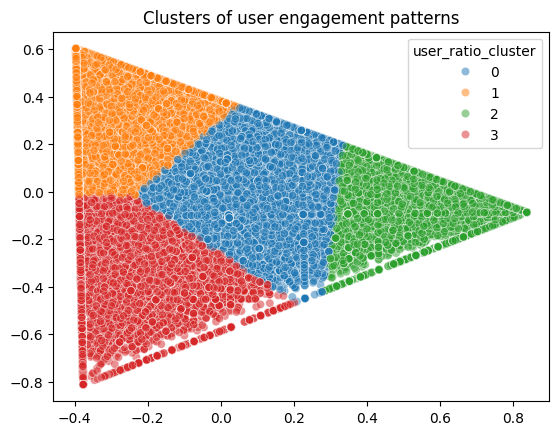

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
queries_df['user_ratio_cluster'] = kmeans.fit_predict(X)

# visualize clusters
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=queries_df['user_ratio_cluster'], palette='tab10', alpha=0.5)
plt.title("Clusters of user engagement patterns")
plt.show()


In [ ]:
# profile each cluster
cluster_profiles = queries_df.groupby('user_ratio_cluster')[ratios].mean()
print(cluster_profiles)

                    click_ratio  follow_ratio  cart_ratio  order_ratio
user_ratio_cluster                                                    
0                      0.387752      0.000460    0.400666     0.211121
1                      0.086900      0.000565    0.741892     0.170643
2                      0.778643      0.000117    0.162109     0.059131
3                      0.077590      0.000201    0.299196     0.623013


**Interpretation of the clusters**

cluster 0 (blue):
- in the center
- Engaged Mid-funnel: Balanced behavior, moderate conversion

cluster 1 (orange):
- top (high PC2 and high PC1)
- window shoppers? high clicks + high cart, but don't purchase

cluster 2 (green):
- right to bottom-right (high PC1, low PC2)
- browsers who occasionally buy (mostly click, some purchases)

cluster 3 (red):
- bottom-left (low PC1, low PC2)
- direct purchasers: skip browsing, go straight to orders


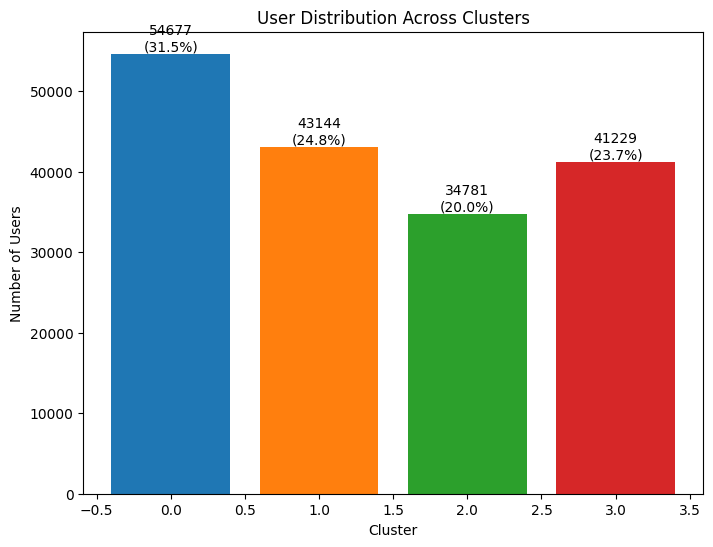

In [ ]:
ratio_cluster_colors = ['#1f77b4',  # Cluster 0 - Blue
                        '#ff7f0e',  # Cluster 1 - Orange
                        '#2ca02c',  # Cluster 2 - Green
                        '#d62728']  # Cluster 3 - Red

plt.figure(figsize=(8, 6))
cluster_counts = queries_df['user_ratio_cluster'].value_counts().sort_index()
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=ratio_cluster_colors)
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('User Distribution Across Clusters')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(queries_df):.1%})',
             ha='center', va='bottom')
plt.show()

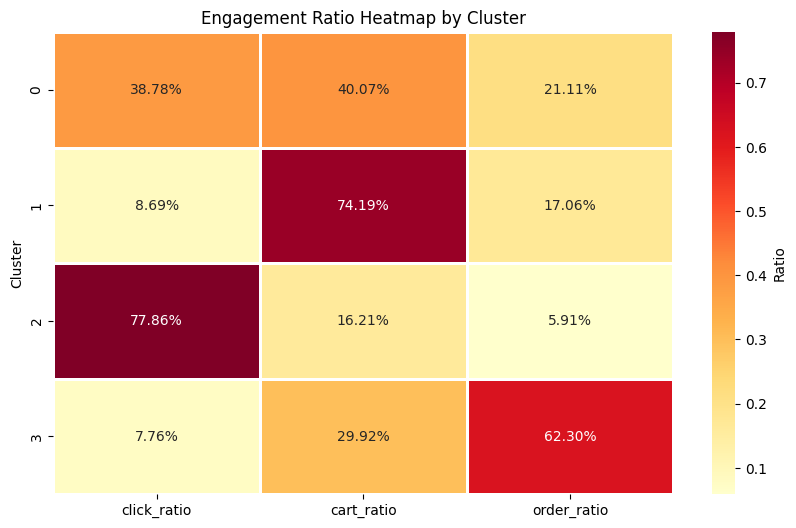

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles[['click_ratio', 'cart_ratio', 'order_ratio']],
            annot=True, fmt='.2%', cmap='YlOrRd',
            cbar_kws={'label': 'Ratio'},
            linewidths=1)
plt.title('Engagement Ratio Heatmap by Cluster')
plt.ylabel('Cluster')
plt.show()

In [ ]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173831 entries, 0 to 173830
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype                                        
---  ------                     --------------   -----                                        
 0   query                      173831 non-null  string[pyarrow]                              
 1   candidate_wid_list         173831 non-null  list<element: string>[pyarrow]               
 2   candidate_label_list       173831 non-null  list<element: double>[pyarrow]               
 3   history_qry_list           173831 non-null  list<element: string>[pyarrow]               
 4   history_wid_list           173831 non-null  list<element: string>[pyarrow]               
 5   history_type_list          173831 non-null  list<element: string>[pyarrow]               
 6   history_time_list          173831 non-null  list<element: int64>[pyarrow]                
 7   candidate_label_list_int   17

# Feature Engineering Part 3

## e. Time Decay Weighting

For each interaction in the user's history, assign a decay weight based on how long ago it occurred.

In [ ]:
# Helper
def compute_age_of_interaction(history_time_list):
  """
  Calculates how long ago each interaction occurred.
  """
  gaps = np.array(history_time_list)

  # Reverse cumulative sum: Age of interaction is the sum of time gaps between all future interactions to now
  interaction_age = np.cumsum(gaps[::-1])[::-1]

  # Drop the last interaction as it corresponds to test query
  interaction_age = interaction_age[:-1]

  return interaction_age

In [ ]:
# Hyperparameters
LAMBDA = 0.02                 # decay rate (to try different values from 0.01 to 0.05)
SECONDS_PER_DAY = 86400
#ORDINAL_TO_TYPE = { 1: 'CLICK', 1.5: 'FLW', 2: 'CART', 3: 'ORD' }

In [ ]:
# Helper: Compute decay score for 1 row
def compute_decay_score_for_row(history_time_list, history_type_list_ordinal, lam=LAMBDA):
  """
  Calculates decay score for a single row.
  Decay score is calculated by
  1. Computing the exponential decay weight for each interaction
  2. Computing the decay score for each interaction by multiplying the decay weight with the ordinal score of the interaction type
  3.1. Sum-based decay: Sum the decay score for all interactions in the row
  3.2. Mean-based decay: Average the decay score for all interactions in the row
  """
  # Interaction ages
  ages_seconds = compute_age_of_interaction(history_time_list)
  ages_days = ages_seconds / SECONDS_PER_DAY

  # Compute exponential decay weight
  time_decay_weights = np.exp(-lam * ages_days)

  # Ordinal types score + Drop the last interaction type as it corresponds to test query
  types_ordinal = np.array(history_type_list_ordinal)
  types_ordinal = types_ordinal[:-1]

  # Compute decay score for 1 interaction
  time_decay_score_for_1_interaction = types_ordinal * time_decay_weights

  # Compute total and avg decay score for all interactions in the row
  total_time_decay = np.sum(time_decay_score_for_1_interaction)
  avg_time_decay = np.mean(time_decay_score_for_1_interaction)

  #type_labels = [ORDINAL_TO_TYPE.get(int(o), 'OTHER') for o in types_ordinal]
  #click_time_decay = np.sum(time_decay_score_for_1_interaction[[t == 'CLICK' for t in type_labels]])) if 'CLICK' in type_labels else 0.0
  #follow_time_decay = np.sum(time_decay_score_for_1_interaction[[t == 'FLW' for t in type_labels]])) if 'FLW' in type_labels else 0.0
  #cart_time_decay = np.sum(time_decay_score_for_1_interaction[[t == 'CART' for t in type_labels]])) if 'CART' in type_labels else 0.0
  #order_time_decay = np.sum(time_decay_score_for_1_interaction[[t == 'ORDER' for t in type_labels]])) if 'ORDER' in type_labels else 0.0

  return total_time_decay, avg_time_decay

We comment out `click_time_decay`, `follow_time_decay`, `cart_time_decay` and `order_time_decay` to avoid redundant features as they overlap with current features `click_ratio`, `follow_ratio`, `cart_ratio` and `order_ratio` respectively in feature engineering part 2

We compute 2 types of decay scores:
1. **Sum-based decay**: `total_time_decay`
- Score captures recency and frequency of interactions --> Identifies loyal shoppers
2. **Mean-based decay**: `avg_time_decay`
- Score captures pure recency of interactions --> Identifies users who are new and active


In [ ]:
def compute_decay_scores(df, lam=LAMBDA):
  totals, avgs = [], []
  #clicks, follows, carts, orders = [], [], [], []

  for gaps, types in zip(df['history_time_list'], df['history_type_list_ordinal']):
    total_time_decay, avg_time_decay = compute_decay_score_for_row(gaps, types, lam)
    totals.append(total_time_decay)
    avgs.append(avg_time_decay)
    #clicks.append(click_time_decay); follows.append(follow_time_decay); carts.append(cart_time_decay); orders.append(order_time_decay)

  time_decay_scores = pd.DataFrame({
      'total_time_decay': totals,
      'avg_time_decay': avgs,
      #'click_time_decay': clicks, 'follow_time_decay': follows, 'cart_time_decay': carts, 'order_time_decay': orders
  }).fillna(0.0)

  return time_decay_scores

In [ ]:
# Compute decay score
time_decay_scores = compute_decay_scores(queries_df)

# Add to queries_df
queries_df = pd.concat([queries_df.reset_index(drop=True), time_decay_scores], axis=1)

# Check
queries_df[['total_time_decay', 'avg_time_decay']].head()

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,total_time_decay,avg_time_decay
0,77.651114,1.437984
1,15.874897,1.221146
2,0.999994,0.999994
3,143.007014,0.966264
4,323.278000,1.039479


Basic EDA

In [ ]:
queries_df['total_time_decay'].describe()

,total_time_decay
count,173831.000000
mean,74.831424
std,112.271957
min,0.000000
25%,11.652660
50%,36.700228
75%,92.987927
max,2660.574157


In [ ]:
queries_df['avg_time_decay'].describe()

,avg_time_decay
count,173831.000000
mean,1.126968
std,0.447601
min,0.000000
25%,0.964607
50%,1.139585
75%,1.340986
max,3.000000


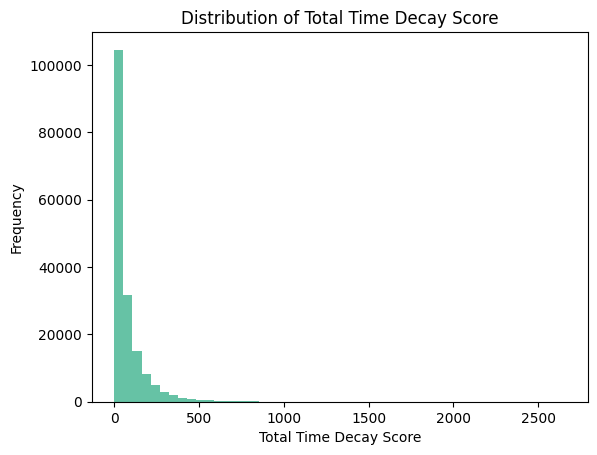

In [ ]:
plt.hist(queries_df['total_time_decay'], bins=50)
plt.title("Distribution of Total Time Decay Score")
plt.xlabel("Total Time Decay Score")
plt.ylabel("Frequency")
plt.show()

Appears highly right-skewed

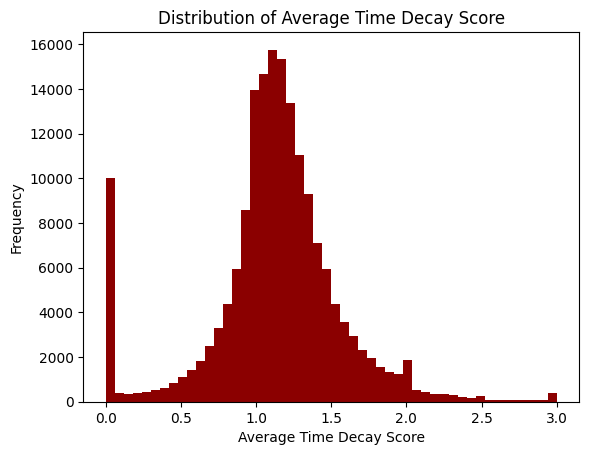

In [ ]:
plt.hist(queries_df['avg_time_decay'], bins=50, color="darkred")
plt.title("Distribution of Average Time Decay Score")
plt.xlabel("Average Time Decay Score")
plt.ylabel("Frequency")
plt.show()

Histogram for average time decay is approximately normally distributed, but there are a large number of queries with average time decay score of 0.0

Investigating queries with `avg_time_decay` = 0.0

In [ ]:
zero_avg_time_decay_df = queries_df[queries_df['avg_time_decay'] == 0.0]
zero_avg_time_decay_df.head()

,query,candidate_wid_list,candidate_label_list,history_qry_list,history_wid_list,history_type_list,history_time_list,candidate_label_list_int,history_type_list_ordinal,query_list,...,min_gap,max_gap,total_active_days,click_ratio,follow_ratio,cart_ratio,order_ratio,user_ratio_cluster,total_time_decay,avg_time_decay
43,57130766,['85463974' '86685689' '47219463' '25547014' '...,[2. 0. 0. 0. 0.],['-1'],['41513157'],['CLICK'],[0],[2 0 0 0 0],[1.],['57130766'],...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,2,0.0,0.0
51,70577329,['3141423' '71035322' '13079579' '92207401' '6...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],[],[],[],[],[1 1 0 0 0 0 0 0 0 0],[],['70577329'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
60,53550463608706386025741925992874602574192...,['54465738' '56835628' '40825331' '54117853' '...,[1. 0. 0. 0. 0.],['63974926\x1883483901\x1839170442\x182833629'],['5465196'],['ORD'],[3608821],[1 0 0 0 0],[3.],['53550463' '60870638' '60257419' '25992874' '...,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,3,0.0,0.0
79,7868616099551658,['70825639' '75918336' '45632272' '28810660' '...,[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],['-1'],['81823512'],['ORD'],[0],[1 1 0 0 0 0 0 0 0 0],[3.],['78686160' '99551658'],...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,3,0.0,0.0
82,72940753924903359690102216109716,['67276933' '89603672' '4719624' '8032997' '37...,[1. 1. 1. 0. 0. 0. 0.],[],[],[],[],[1 1 1 0 0 0 0],[],['72940753' '92490335' '96901022' '16109716'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0


Investigate correlation of **total time decay** with `click_ratio`, `follow_ratio`, `cart_ratio`, `order_ratio`

In [ ]:
# Correlation matrix
cols_to_check_total = ['total_time_decay', 'click_ratio', 'follow_ratio', 'cart_ratio', 'order_ratio']
corr = queries_df[cols_to_check_total].corr()
corr

,total_time_decay,click_ratio,follow_ratio,cart_ratio,order_ratio
total_time_decay,1.000000,0.008114,0.042412,0.053507,-0.064544
click_ratio,0.008114,1.000000,-0.020353,-0.591159,-0.584411
follow_ratio,0.042412,-0.020353,1.000000,0.014118,-0.018004
cart_ratio,0.053507,-0.591159,0.014118,1.000000,-0.308620
order_ratio,-0.064544,-0.584411,-0.018004,-0.308620,1.000000


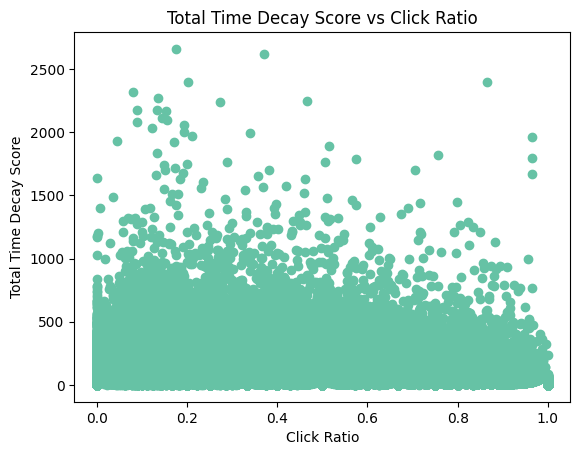

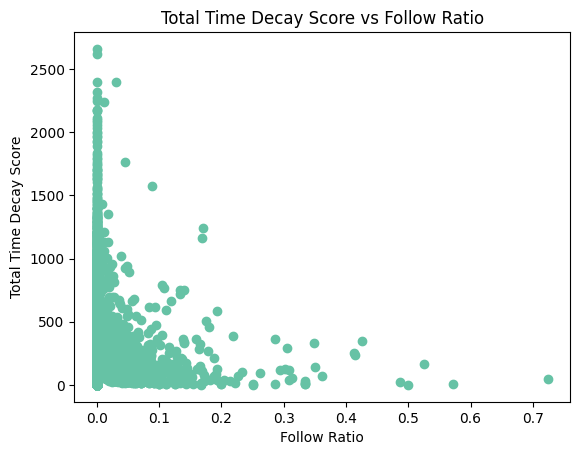

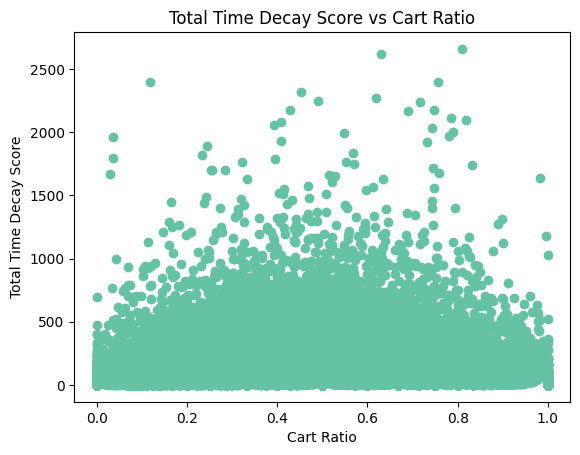

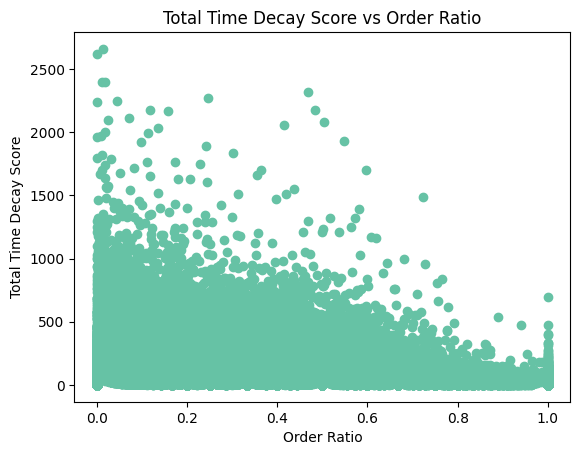

In [ ]:
# Correlation with click_ratio
plt.scatter(queries_df['click_ratio'], queries_df['total_time_decay'])
plt.title("Total Time Decay Score vs Click Ratio")
plt.xlabel("Click Ratio")
plt.ylabel("Total Time Decay Score")
plt.show()


# Correlation with follow_ratio
plt.scatter(queries_df['follow_ratio'], queries_df['total_time_decay'])
plt.title("Total Time Decay Score vs Follow Ratio")
plt.xlabel("Follow Ratio")
plt.ylabel("Total Time Decay Score")
plt.show()


# Correlation with cart_ratio
plt.scatter(queries_df['cart_ratio'], queries_df['total_time_decay'])
plt.title("Total Time Decay Score vs Cart Ratio")
plt.xlabel("Cart Ratio")
plt.ylabel("Total Time Decay Score")
plt.show()


# Correlation with order_ratio
plt.scatter(queries_df['order_ratio'], queries_df['total_time_decay'])
plt.title("Total Time Decay Score vs Order Ratio")
plt.xlabel("Order Ratio")
plt.ylabel("Total Time Decay Score")
plt.show()

There appears to be **low correlation** between total time decay and `click_ratio`, `follow_ratio`, `cart_ratio` and `order_ratio`.

Investigate correlation of **average time decay** with `click_ratio`, `follow_ratio`, `cart_ratio`, `order_ratio`

In [ ]:
cols_to_check_avg = ['avg_time_decay', 'click_ratio', 'follow_ratio', 'cart_ratio', 'order_ratio']
corr = queries_df[cols_to_check_avg].corr()
corr

,avg_time_decay,click_ratio,follow_ratio,cart_ratio,order_ratio
avg_time_decay,1.000000,-0.150827,0.016719,0.233730,-0.057583
click_ratio,-0.150827,1.000000,-0.020353,-0.591159,-0.584411
follow_ratio,0.016719,-0.020353,1.000000,0.014118,-0.018004
cart_ratio,0.233730,-0.591159,0.014118,1.000000,-0.308620
order_ratio,-0.057583,-0.584411,-0.018004,-0.308620,1.000000


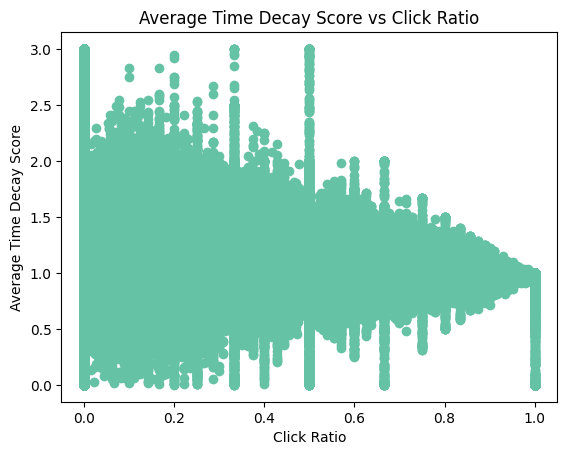

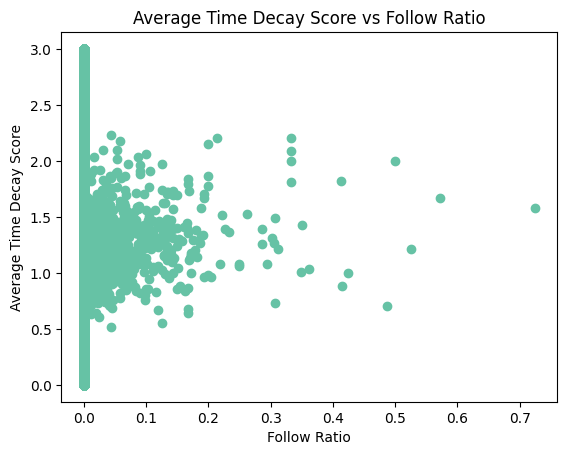

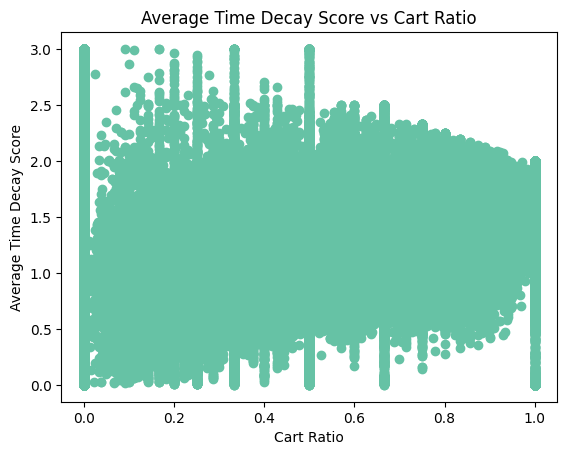

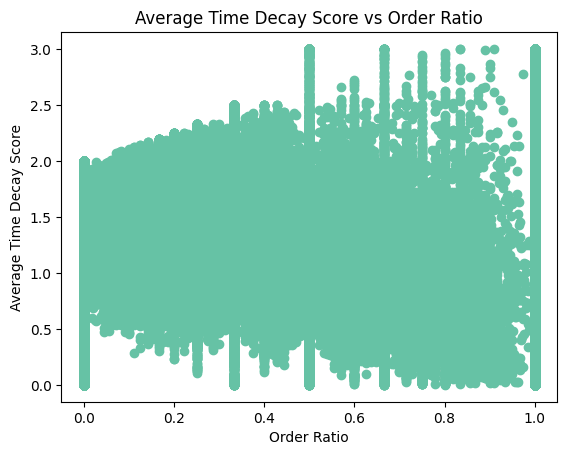

In [ ]:
# Correlation with click_ratio
plt.scatter(queries_df['click_ratio'], queries_df['avg_time_decay'])
plt.title("Average Time Decay Score vs Click Ratio")
plt.xlabel("Click Ratio")
plt.ylabel("Average Time Decay Score")
plt.show()


# Correlation with follow_ratio
plt.scatter(queries_df['follow_ratio'], queries_df['avg_time_decay'])
plt.title("Average Time Decay Score vs Follow Ratio")
plt.xlabel("Follow Ratio")
plt.ylabel("Average Time Decay Score")
plt.show()


# Correlation with cart_ratio
plt.scatter(queries_df['cart_ratio'], queries_df['avg_time_decay'])
plt.title("Average Time Decay Score vs Cart Ratio")
plt.xlabel("Cart Ratio")
plt.ylabel("Average Time Decay Score")
plt.show()


# Correlation with order_ratio
plt.scatter(queries_df['order_ratio'], queries_df['avg_time_decay'])
plt.title("Average Time Decay Score vs Order Ratio")
plt.xlabel("Order Ratio")
plt.ylabel("Average Time Decay Score")
plt.show()

While it is difficult to interpret any inherent pattern from the scatterplots, there appears to be a slightly higher correlation between average time decay and `cart_ratio`, `click_ratio` from the correlation matrix.

In [ ]:
queries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173831 entries, 0 to 173830
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype                                        
---  ------                     --------------   -----                                        
 0   query                      173831 non-null  string[pyarrow]                              
 1   candidate_wid_list         173831 non-null  list<element: string>[pyarrow]               
 2   candidate_label_list       173831 non-null  list<element: double>[pyarrow]               
 3   history_qry_list           173831 non-null  list<element: string>[pyarrow]               
 4   history_wid_list           173831 non-null  list<element: string>[pyarrow]               
 5   history_type_list          173831 non-null  list<element: string>[pyarrow]               
 6   history_time_list          173831 non-null  list<element: int64>[pyarrow]                
 7   candidate_label_list_int   17

# Export data

In [ ]:
DATA_PATH_MERGED = "/content/drive/MyDrive/BT4222 Group 3/1. Data Preparation/Data/features_engineered/user_behavior_data_sampled_parsed_features_merged.parquet"

queries_df.to_parquet(DATA_PATH_MERGED,
                      engine="pyarrow",
                      index=False)